Index(['model_name', 'engine_type', 'engine_power', 'max_speed',
       'cruise_speed', 'stall_speed', 'fuel_tank', 'all_eng_roc',
       'out_eng_roc', 'takeoff_distance', 'landing_distance', 'empty_weight',
       'length', 'wing_span', 'range', 'price'],
      dtype='object')
       engine_power   max_speed  cruise_speed  stall_speed     fuel_tank  \
count    517.000000  517.000000    517.000000   517.000000    517.000000   
mean     869.328820  212.794971    200.177950    60.656673   1419.379110   
std     1783.602771  114.106830    103.358089    16.432874   4278.320773   
min       60.000000   64.000000     70.000000    27.000000     12.000000   
25%      200.000000  143.000000    131.000000    50.000000     50.000000   
50%      285.000000  177.000000    169.000000    56.000000     89.000000   
75%      550.000000  238.000000    229.000000    73.000000    335.000000   
max    14750.000000  755.000000    511.000000   115.000000  41000.000000   

        all_eng_roc  out_eng_roc  t

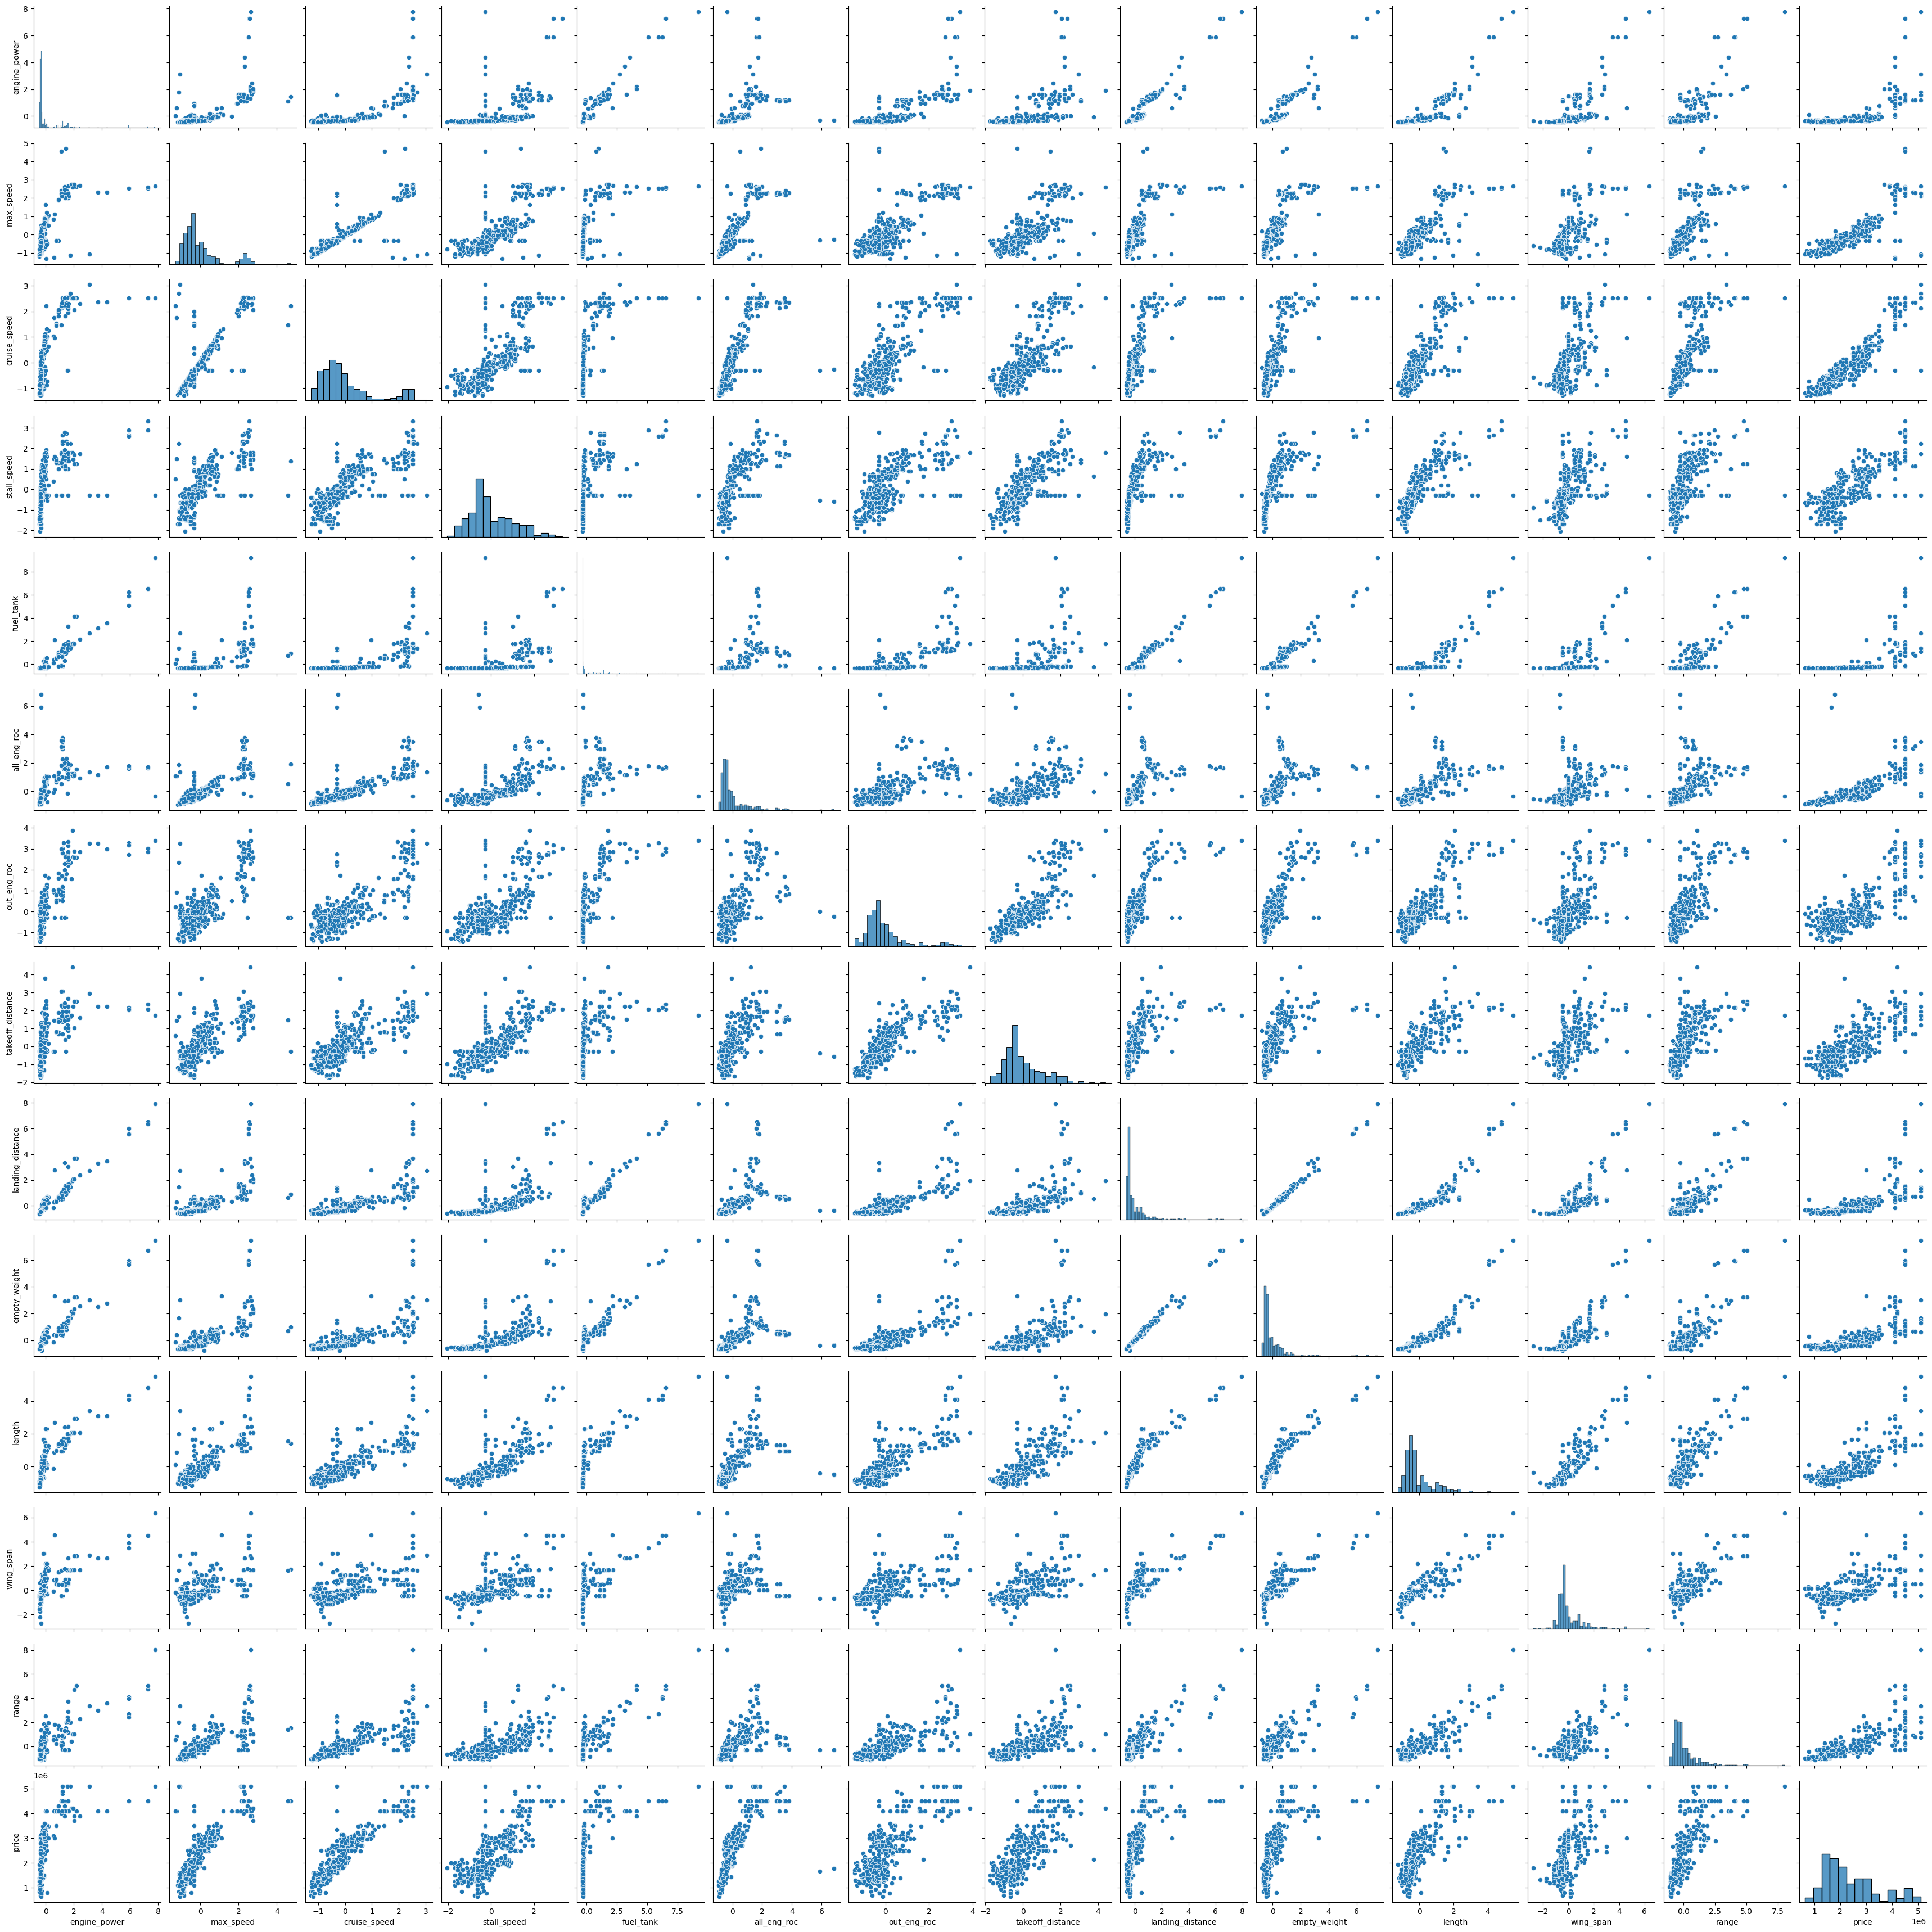

Skewness:
 fuel_tank           5.046265
engine_power        4.690213
landing_distance    4.296546
empty_weight        4.191493
all_eng_roc         3.003339
range               2.945743
wing_span           2.199430
length              2.101332
out_eng_roc         1.746618
max_speed           1.691196
cruise_speed        1.379109
takeoff_distance    1.054754
price               0.949636
stall_speed         0.709297
dtype: float64


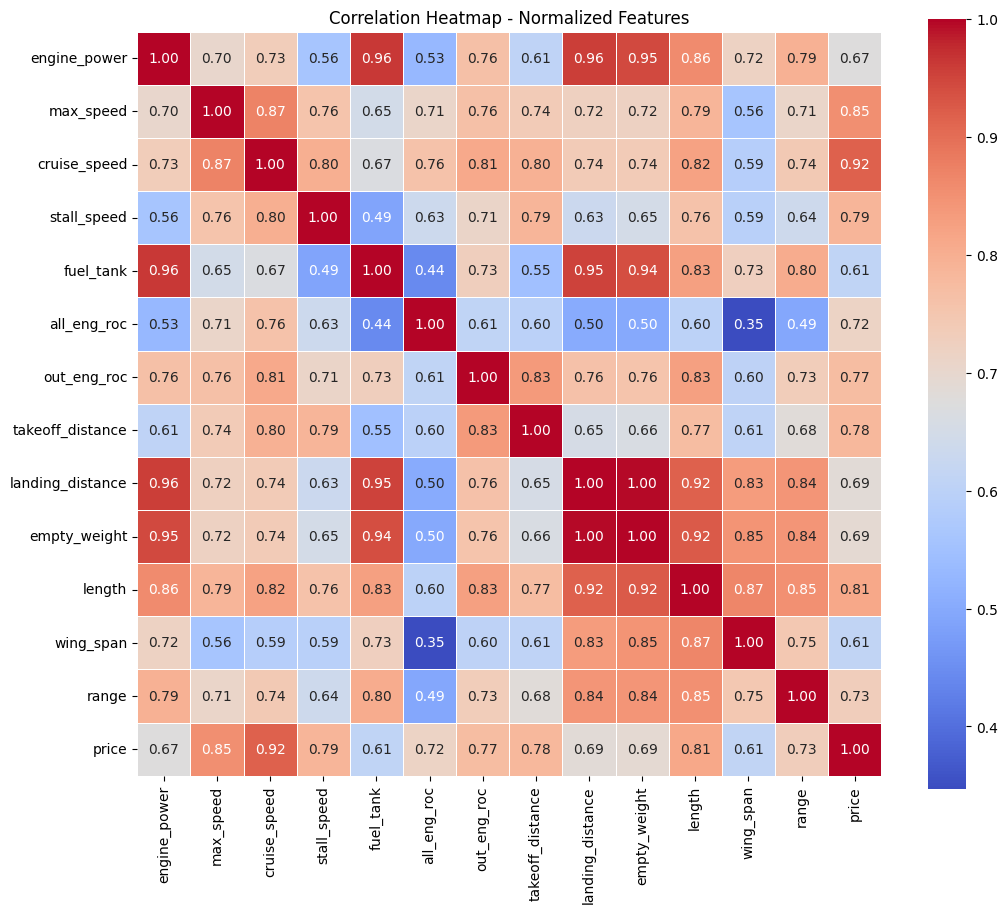

In [4]:
## Data preprocessing with normalization

### Load libraries


# Base libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical models
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Preprocessing
from sklearn.preprocessing import StandardScaler

# ISLP (Statistical Learning)
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)

### Load Dataset


# Load the Aircraft Price dataset
data = pd.read_csv("Data/aircraft_price.csv", encoding='utf-8')
target = 'price'

### Initial Data Inspection

# Check column names and summary
print(data.columns)
print(data.describe())

# Check missing values
missing_count = data.isnull().sum().sort_values(ascending=False)
print(missing_count[missing_count > 0])


### Drop Missing Values


# Drop rows with any missing values
data.dropna(axis=0, inplace=True)
print("Remaining nulls:\n", data.isnull().sum().sum())


### Normalize Numeric Features

# Copy data for normalization
normalized_data = data.copy()

# Identify numeric columns (excluding target for now)
numeric_cols = normalized_data.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove(target)

# Standardize numeric features
def normalize_df(df, cols):
    scaler = StandardScaler()
    df[cols] = scaler.fit_transform(df[cols])
    return df

normalized_data = normalize_df(normalized_data, numeric_cols)

### Verify Normalization

# Check mean and std of normalized features
descr = normalized_data[numeric_cols].agg(['mean', 'std']).T
print(descr)


### VIF Analysis on Normalized Data

# Prepare data for VIF (add constant)
X = sm.add_constant(normalized_data[numeric_cols])

# Compute VIF for each feature
vif_df = pd.DataFrame({
    'Regressor': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
}).sort_values('VIF', ascending=False)
print(vif_df)


### Skewness Check on Normalized Data

# Plot distributions to inspect skewness
g = sns.pairplot(normalized_data[numeric_cols + [target]])
plt.show()

# Compute skewness
skewness = normalized_data[numeric_cols + [target]].skew().sort_values(ascending=False)
print("Skewness:\n", skewness)


### (Optional) Log-transform Target

# If target remains skewed, apply log-transform
data_log = normalized_data.copy()
data_log[target] = np.log1p(data_log[target])


### Correlation Matrix

# Seleziona solo le colonne numeriche (già normalizzate)
numeric_data_only = normalized_data.select_dtypes(include=[np.number])

# Calcola e mostra la matrice di correlazione
corr = numeric_data_only.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=.5)
plt.title('Correlation Heatmap - Normalized Features')
plt.show()


### Final Dataset Save

# Save normalized dataset
normalized_data.to_csv("Data/aircraft_price_normalized.csv", index=False)


In [5]:
# Verifica media e deviazione standard delle colonne normalizzate
means_stds = normalized_data[numeric_cols].agg(['mean', 'std']).T
means_stds.columns = ['Mean', 'Std Dev']

# Ordina per deviazione standard (opzionale)
means_stds = means_stds.sort_values('Std Dev', ascending=False)

print("Check di normalizzazione (mean ≈ 0, std ≈ 1):\n")
print(means_stds)


Check di normalizzazione (mean ≈ 0, std ≈ 1):

                          Mean   Std Dev
landing_distance  2.802930e-17  1.000988
engine_power      4.204395e-17  1.000988
max_speed         4.204395e-17  1.000988
cruise_speed      1.121172e-16  1.000988
stall_speed       1.541611e-16  1.000988
fuel_tank        -1.401465e-17  1.000988
out_eng_roc       7.708057e-17  1.000988
takeoff_distance  7.708057e-17  1.000988
empty_weight     -6.306592e-17  1.000988
length           -1.261318e-16  1.000988
wing_span        -7.708057e-17  1.000988
range            -8.408790e-17  1.000988
all_eng_roc       1.401465e-17  1.000988
